# **Heart Attack Risk Prediction Project**
### **Author**: Saubhagya Srivastav
### **Date**: 22 FEB 2025


## DATA LOADING

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("/framingham_heart_study.csv", header = 0,na_values=["NA"])
df.head()

,male,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RISK
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### DATA WRANGLING

In [5]:
df.rename(columns={'prevalentHyp': 'Hypertension'}, inplace=True)
df.replace(np.nan,df.mean(),inplace=True)

In [6]:
print(df.isnull().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
prevalentStroke    0
Hypertension       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
RISK               0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'sysBP', 'diaBP', 'totChol', 'glucose', 'BMI']] = scaler.fit_transform(df[['age', 'sysBP', 'diaBP', 'totChol', 'glucose', 'BMI']])


## EXPLORATORY DATA ANALYSIS

In [8]:
correlations = df.corr()["RISK"].sort_values(ascending=False)
print(correlations)


RISK               1.000000
age                0.225408
sysBP              0.216374
Hypertension       0.177458
diaBP              0.145112
glucose            0.120451
diabetes           0.097344
male               0.088374
totChol            0.081807
BMI                0.074788
prevalentStroke    0.061823
cigsPerDay         0.057646
heartRate          0.022892
currentSmoker      0.019448
Name: RISK, dtype: float64


In [9]:
print(df.columns)

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke',
       'Hypertension', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'RISK'],
      dtype='object')


In [10]:
df.drop(columns=['currentSmoker', 'heartRate', 'cigsPerDay', 'prevalentStroke'], inplace=True)
df.head()

,male,age,Hypertension,diabetes,totChol,sysBP,diaBP,BMI,glucose,RISK
0,1,-1.234283,0,0,-0.940825,-1.196267,-1.083027,0.287258,-0.217427,0
1,0,-0.417664,0,0,0.300085,-0.515399,-0.159355,0.719668,-0.261231,0
2,1,-0.184345,0,0,0.187275,-0.220356,-0.243325,-0.113213,-0.524054,0
3,0,1.332233,1,0,-0.263965,0.800946,1.016227,0.682815,0.921472,1
4,0,-0.417664,0,0,1.089756,-0.106878,0.092555,-0.663554,0.133004,0


In [11]:
print(df.describe())


              male           age  Hypertension     diabetes       totChol  \
count  4240.000000  4.240000e+03   4240.000000  4240.000000  4.240000e+03   
mean      0.429245  1.256856e-16      0.310613     0.025708 -6.284281e-18   
std       0.495027  1.000118e+00      0.462799     0.158280  1.000118e+00   
min       0.000000 -2.050902e+00      0.000000     0.000000 -2.926282e+00   
25%       0.000000 -8.843035e-01      0.000000     0.000000 -6.926429e-01   
50%       0.000000 -6.768471e-02      0.000000     0.000000 -6.090666e-02   
75%       1.000000  7.489341e-01      1.000000     0.000000  5.708296e-01   
max       1.000000  2.382172e+00      1.000000     1.000000  1.036274e+01   

              sysBP         diaBP           BMI       glucose         RISK  
count  4.240000e+03  4.240000e+03  4.240000e+03  4.240000e+03  4240.000000  
mean  -3.854359e-17  3.351617e-18 -3.770569e-16 -3.921392e-16     0.151887  
std    1.000118e+00  1.000118e+00  1.000118e+00  1.000118e+00     0.358953 

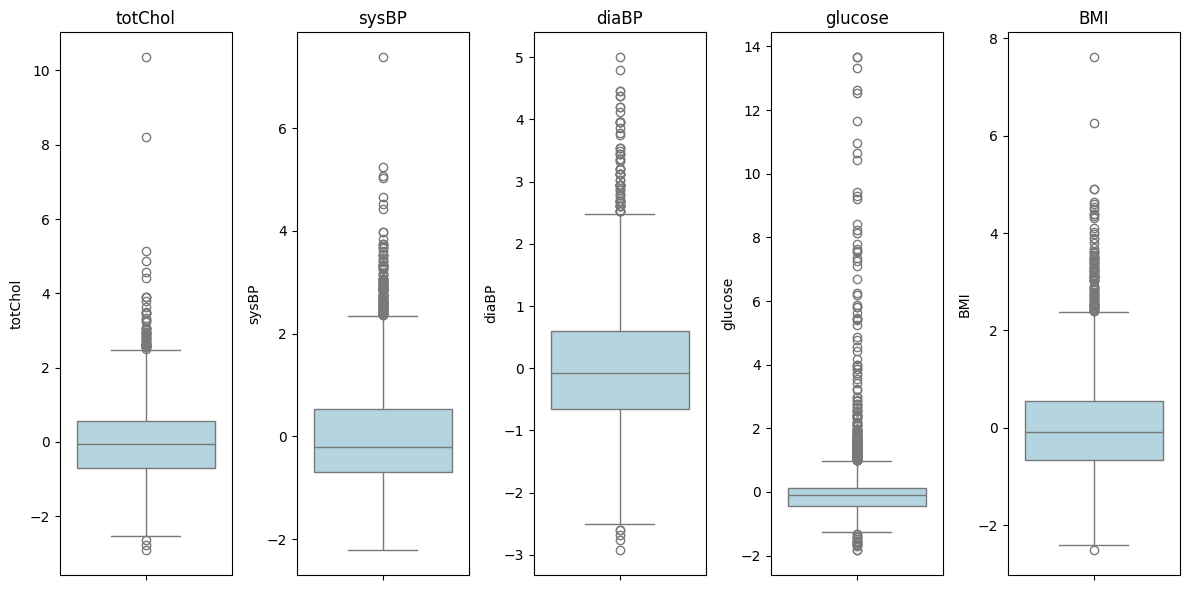

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns to check for outliers
num_cols = ['totChol', 'sysBP', 'diaBP', 'glucose', 'BMI']

# Set figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for each numerical feature
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)  # Subplots in a row
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)

plt.tight_layout()
plt.show()


*Lets check for the data balance*

In [13]:
df['RISK'].value_counts()

,count
RISK,
0,3596
1,644


*AS YOU CAN SEE ABOVE THE DATA IS HIGHLY IMBALANCED*

In [15]:
import h2o
from h2o.frame import H2OFrame
import pandas as pd

# Initialize H2O
h2o.init()

# Convert Pandas DataFrame to H2O Frame
df_h2o = H2OFrame(df)

# Define the target column
target = "RISK"

# Convert target column to categorical
df_h2o[target] = df_h2o[target].asfactor()

# Convert H2OFrame to Pandas for manual balancing
df_pd = df_h2o.as_data_frame()

# Separate classes
df_majority = df_pd[df_pd[target] == 0]
df_minority = df_pd[df_pd[target] == 1]

# Oversample minority class (duplicate rows)
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine majority and oversampled minority
balanced_df = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Convert back to H2O Frame
balanced_h2o = H2OFrame(balanced_df)

# Print class distribution
print("Balanced Class Distribution:\n", balanced_h2o[target].table())


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,4 mins 16 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 20 days
H2O_cluster_name:,H2O_from_python_unknownUser_0lmt2g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Balanced Class Distribution:
   RISK    Count
     0     3596
     1     3596
[2 rows x 2 columns]



In [17]:
df = balanced_h2o.as_data_frame()#converting balanced data to pandas dataframe
df['RISK'].value_counts()

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,count
RISK,
1,3596
0,3596


## MODEL DEVELOPMENT AND EVALUATION

In [18]:
from sklearn.model_selection import train_test_split
Y = df['RISK']
X =df.drop('RISK',axis=1)
x_train, x_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=1)

In [28]:
#SVM MODEL
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Train SVM model
svm_model = SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced', random_state=1)
svm_model.fit(x_train, y_train)

# Predictions
y_pred = svm_model.predict(x_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.67      0.68       709
           1       0.69      0.70      0.69       730

    accuracy                           0.69      1439
   macro avg       0.69      0.69      0.69      1439
weighted avg       0.69      0.69      0.69      1439



In [29]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define Decision Tree model
dt = DecisionTreeClassifier(random_state=1)

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Try both Gini and Entropy
    'max_depth': [5, 10, 15, None],  # Vary max depth
    'min_samples_split': [2, 5, 10],  # Control when to split a node
    'min_samples_leaf': [1, 2, 5]  # Control minimum samples in a leaf node
}

# Apply GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(x_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9145239749826268
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       709
           1       0.86      0.99      0.92       730

    accuracy                           0.91      1439
   macro avg       0.93      0.91      0.91      1439
weighted avg       0.92      0.91      0.91      1439



In [30]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(x_train, y_train)

# Predictions
y_pred = log_reg.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(report)


Accuracy: 0.6546
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       709
           1       0.66      0.67      0.66       730

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439



In [33]:
#XGBOOST CLASSIFIER
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np




# Train XGBoost with Adjusted Class Weights
xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
      # Increased weight
    random_state=42
)

xgb.fit(x_train, y_train)

# Predictions
y_pred = xgb.predict(x_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6608756080611535
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       709
           1       0.66      0.70      0.68       730

    accuracy                           0.66      1439
   macro avg       0.66      0.66      0.66      1439
weighted avg       0.66      0.66      0.66      1439



***THE BEST MODEL FROM VARIOUS MODELS IS FOUND TO BE DECISION TREE WITH 91% ACCURACY ***

In [36]:
import joblib
joblib.dump(dt, "model.pkl")

print("Model saved as model.pkl")

Model saved as model.pkl


In [37]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>